<a href="https://colab.research.google.com/github/PSLeon24/Generative_Image_Models/blob/main/step02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Generative Model Implementation from Real Data

(25000,)


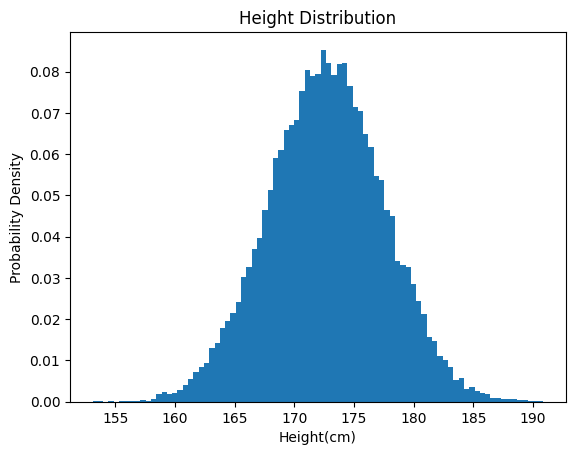

In [6]:
import numpy as np
import matplotlib.pyplot as plt

xs = np.loadtxt('/content/height.txt')
print(xs.shape)

plt.hist(xs, bins='auto', density=True)
plt.xlabel('Height(cm)')
plt.ylabel('Probability Density')
plt.title('Height Distribution')
plt.show()

In [8]:
mu = np.mean(xs)
sigma = np.std(xs)

print(f'Mean: {mu:.2f}')
print(f'Standard Deviation: {sigma:.2f}')

Mean: 172.70
Standard Deviation: 4.83


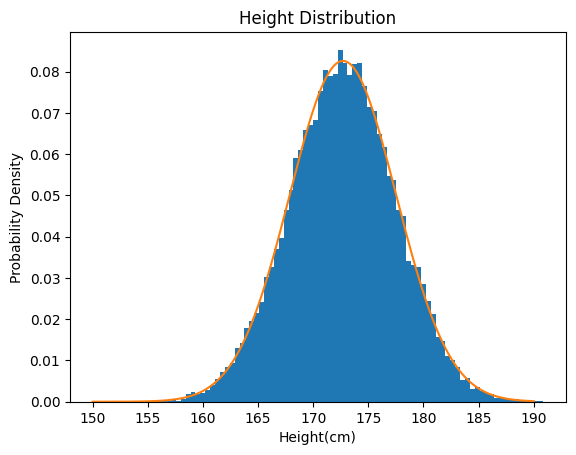

In [9]:
def normal(x, mu=0, sigma=1):
  return 1 / (np.sqrt(2 * np.pi) * sigma) * np.exp(-0.5 * ((x - mu) / sigma) ** 2)

x = np.linspace(150, 190, 1000)
y = normal(x, mu, sigma)

plt.hist(xs, bins='auto', density=True)
plt.plot(x, y)
plt.xlabel('Height(cm)')
plt.ylabel('Probability Density')
plt.title('Height Distribution')
plt.show()

In [18]:
# generate new data
sample = np.random.normal(mu, sigma, 20) # np.random.normal(loc=0.0, scale=1.0, size=None) ~ loc: mean, scale: std, size: N
for i in range(len(sample)):
  sample[i] = round(sample[i], 2)
print(f'{sample}')

[175.54 172.88 175.61 182.79 178.83 169.27 162.32 164.04 178.41 179.05
 174.76 176.89 175.28 168.85 173.45 170.52 171.13 172.81 168.41 174.67]


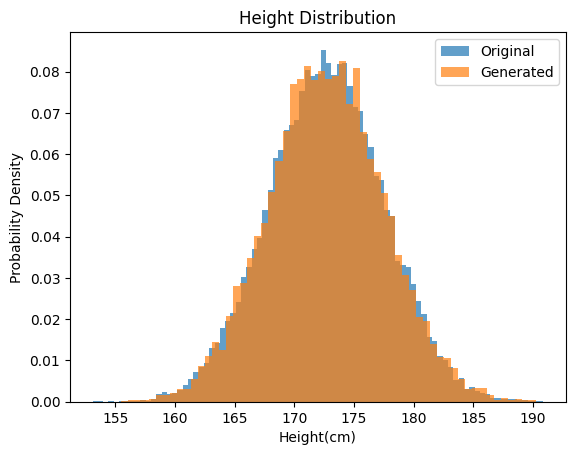

In [19]:
samples = np.random.normal(mu, sigma, 10000)

plt.hist(xs, bins='auto', density=True, alpha=0.7, label='Original')
plt.hist(samples, bins='auto', density=True, alpha=0.7, label='Generated')
plt.xlabel('Height(cm)')
plt.ylabel('Probability Density')
plt.title('Height Distribution')
plt.legend()
plt.show()

### 3. Cumulative Distribution Function

In [21]:
from scipy.stats import norm

x = 1.0
p = norm.cdf(x, loc=0, scale=1)

print(f'{p:.3f}')

0.841


In [27]:
p1 = norm.cdf(160, mu, sigma)
p2 = norm.cdf(180, mu, sigma)

print(f'p(x <= 160): {p1:.3f}') # 키가 160cm 보다 작을 확률
print(f'p(x > 180): {1-p2:.3f}') # 키가 180cm 보다 클 확률

p(x <= 160): 0.004
p(x > 180): 0.065
